## 1. 연세대학교 2, 3월 학사일정 불러오기

### BeautifulSoup으로 크롤링

In [2]:
!pip3 install requests
!pip3 install bs4
!pip3 install selenium

In [47]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html, 'html.parser') 

In [52]:
url = 'https://www.yonsei.ac.kr/sc/support/calendar.jsp'
res = requests.get(url)
soup = BeautifulSoup(res.text, 'html.parser')

In [54]:
soup.find('span', class_='month2').get_text()

'02 FEB'

In [74]:
lin = soup.find_all('table')
lind = []
for i in lin:
  lind.append(i.get_text().replace('\t', ''))
print(lind)

['\n1학기 학사일정 표\n\n\n\n\n\n\n02 FEB\n\n\n1(수) \n\n\n\n\n\n휴\xa0·\xa0복학\xa0접수\xa0시작\n\n\n\n\n\n\n13(월)~17(금) \n\n\n2023-1학기\xa0수강신청\n\n\n\n\n\n\n17(금)~23(목) \n\n\n2023-1학기\xa0등록\n\n\n\n\n22(수) \n\n\n\n\n복학\xa0접수\xa0마감\n\n\n\n\n26(일) \n\n\n\n\n졸업예배\n\n\n\n\n27(월) \n\n\n\n\n학위수여식\n\n\n03 MAR\n\n\n1(수) \n\n\n\n\n삼일절\n\n\n\n\n2(목) \n\n\n\n\n개강\xa0/\xa0교무위원회\n\n\n\n\n\n\n6(월)~8(수) \n\n\n수강신청\xa0확인\xa0및\xa0변경\n\n\n\n\n\n\n10(금)~13(월) \n\n\n2023-1학기\xa0추가등록\n\n\n\n\n\n\n13(월)~17(금) \n\n\n조기졸업\xa0신청\n\n\n\n\n15(수) \n\n\n\n\n미등록자\xa0일반\xa0휴학\xa0접수\xa0마감\xa0/\xa0등록금\xa0전액반환\xa0마감\n\n\n04 APR\n\n\n6(목) \n\n\n\n\n\n교무위원회\n\n\n\n\n7(금) \n\n\n\n\n\n학기\xa01/3선\n\n\n\n\n\n\n9(일)~15(토) \n\n\n\n고난주간\n\n\n\n\n9(일) \n\n\n\n\n\n부활절\n\n\n\n\n\n\n20(목)~26(수) \n\n\n\n중간시험\n\n\n\n\n\n\n27(목)~5.3(수) \n\n\n\n2023-2학기\xa0캠퍼스내\xa0소속변경\xa0신청\n\n\n\n\n\n\n27(목)~5.1(월) \n\n\n\n수강철회\n\n\n05 MAY\n\n\n1(월) \n\n\n\n\n근로자의\xa0날\n\n\n\n\n\n\n2(화)~4(목) \n\n\n\nS/U평가\xa0신청\n\n\n\n\n4(목) \n\n\n\n\n\n교무위원회\n\n\n\n\n5(금) \n\n\n\n

### 데이터프레임 생성

In [75]:
import pandas as pd
schedule = pd.DataFrame({
  '2월':['1(수) - 휴복학 접수 시작', '13(월)~17(금) - 2023-1학기 수강신청', '17(금)~23(목) - 2023-1학기 등록', '22(수) - 복학 접수 마감', '26(일) - 졸업예배', '27(월) - 학위수여식'],
  '3월':['1(수) - 삼일절', '2(목) - 개강 / 교무위원회', '6(월)~8(수) - 수강신청 확인 및 변경', '10(금)~13(월) - 2023-1학기 추가등록', '13(월)~17(금) - 조기졸업 신청', '15(수) - 미등록자 일반 휴학 접수 마감 / 등록금 전액반환 마감']
})
schedule

,2월,3월
0,1(수) - 휴복학 접수 시작,1(수) - 삼일절
1,13(월)~17(금) - 2023-1학기 수강신청,2(목) - 개강 / 교무위원회
2,17(금)~23(목) - 2023-1학기 등록,6(월)~8(수) - 수강신청 확인 및 변경
3,22(수) - 복학 접수 마감,10(금)~13(월) - 2023-1학기 추가등록
4,26(일) - 졸업예배,13(월)~17(금) - 조기졸업 신청
5,27(월) - 학위수여식,15(수) - 미등록자 일반 휴학 접수 마감 / 등록금 전액반환 마감


## 2. Selenium으로 고려대학교 네이버 썸네일 이미지 가져오기

In [76]:
import selenium
from selenium import webdriver

driver = webdriver.Chrome()

In [77]:
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

driver.get('https://www.naver.com/') 

driver.implicitly_wait(5)

In [78]:
search = driver.find_element(By.XPATH, '//*[@id="query"]')

In [79]:
search.send_keys('고려대학교')

In [80]:
search.send_keys(Keys.RETURN)

In [82]:
search = driver.find_element(By.XPATH, '//*[@id="lnb"]/div[1]/div/ul/li[2]/a')

In [83]:
search.send_keys(Keys.RETURN)

In [84]:
img = driver.find_element(By.XPATH, '//*[@id="main_pack"]/section[2]/div/div[1]/div[1]/div[22]/div/div[1]/a/img')
img_url = img.get_attribute('src')

In [85]:
print(img_url)

https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2F20161005_73%2Fdongnam2c_1475671671218fzB22_JPEG%2F20161004_101639.jpg&type=l340_165


In [87]:
import requests
from io import BytesIO
from PIL import Image
import time

# 다운받을 이미지 url
url = img_url

# request.get 요청
res = requests.get(url)

#Img open
request_get_img = Image.open(BytesIO(res.content))

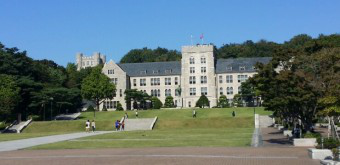

In [88]:
request_get_img

In [89]:
driver.close()